<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/5week/CIFAR__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [30]:
#3. CIFAR 10 3개 분류(개, 고양이, 말)


# --- CIFAR-10 로드 ---
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 클래스 이름 정의
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 사용할 클래스 선택
selected_classes = ['cat', 'dog', 'horse']
selected_idx = [class_names.index(c) for c in selected_classes]

# --- 해당 클래스만 필터링 ---
train_mask = np.isin(y_train, selected_idx).flatten()
test_mask = np.isin(y_test, selected_idx).flatten()

x_train, y_train = x_train[train_mask], y_train[train_mask]
x_test, y_test = x_test[test_mask], y_test[test_mask]

# 라벨을 0~2로 다시 매핑
label_map = {v: i for i, v in enumerate(selected_idx)}
y_train = np.array([label_map[int(y)] for y in y_train])
y_test = np.array([label_map[int(y)] for y in y_test])

# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

/tmp/ipython-input-822884218.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train = np.array([label_map[int(y)] for y in y_train])
/tmp/ipython-input-822884218.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_test = np.array([label_map[int(y)] for y in y_test])


In [31]:
x_train.shape

(15000, 32, 32, 3)

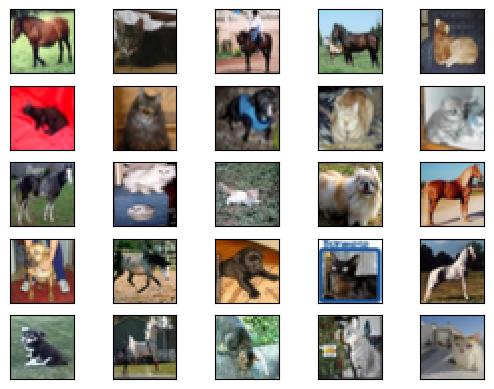

In [32]:
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [33]:
#필요없는듯, 전에한건 3차원이였고 이번꺼는 이미 rgb여서 4차원이네
#X_train_final = x_train.reshape((-1, 32, 32, 3))
#X_test_final = x_test.reshape((-1, 32, 32, 3))

In [34]:
X_train_final = x_train
X_test_final = x_test

In [37]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam',
		loss='sparse_categorical_crossentropy',
		metrics=['accuracy'])
model.fit(X_train_final, y_train, epochs=5)
model.evaluate(X_test_final,  y_test, verbose=2)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.4665 - loss: 1.0527
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6430 - loss: 0.7681
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6999 - loss: 0.6845
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7347 - loss: 0.6088
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7552 - loss: 0.5642
94/94 - 1s - 11ms/step - accuracy: 0.7363 - loss: 0.6092


[0.6091771125793457, 0.7363333106040955]